In [3]:
import pandas as pd
from sklearn import linear_model
import pandas
from sklearn.model_selection import KFold
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
df = pd.read_excel("pm_nasa.xlsx")

In [2]:
df.tail(5)

NameError: name 'df' is not defined

In [51]:
x1 = pd.DataFrame(df['TAU'])
x2 = pd.DataFrame(df[['TAU', 'TMP']])
x3 = pd.DataFrame(df[['TAU', 'TMP','RH']])
x4 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL']])
x5 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m']])
x6 = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

In [40]:

# x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

# y = pd.DataFrame(df['PM24H'])

In [32]:

def train_model(features,y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    regression_model = linear_model.LinearRegression()
    regression_model.fit(X_train, y_train)
    predictions = sklearn.model_selection.cross_val_predict(regression_model,X_test,y_test,cv=4)
    r2 = pearsonr(y_test,predictions)[0]
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    # data points
#     fig, axs = plt.subplots(3, 2)
    fig = plt.figure()
    plt.scatter(y_test, predictions, s=10)
    plt.xlabel('Observed PM2.5 in μg/m\u00b3')
    plt.ylabel('Estimated PM2.5 in μg/m\u00b3')
    # predicted values
    t = np.linspace(0, y_test.max(), 10)
    plt.plot(t, t, color='r')
    # plt.show()|
    return r2,rmse,mae

In [22]:
from sklearn.linear_model import Ridge,ElasticNet
from scipy.stats import pearsonr

In [86]:
def ridgeR(features,y,alpha):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    #X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    regression_model = Ridge(alpha)
    regression_model.fit(X_train, y_train)
    predictions = sklearn.model_selection.cross_val_predict(regression_model,X_test,y_test,cv=4)
    train_error = regression_model.score(X_train, y_train)
    test_error = regression_model.score(X_test, y_test)
    print("Train Error:",train_error)
    print("Test Error:",train_error)
    r2 = pearsonr(y_test,predictions)[0]
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print("For alpha: ",alpha)
    # data points
#     fig, axs = plt.subplots(3, 2)
#     fig = plt.figure()
#     plt.scatter(y_test, predictions, s=10)
#     plt.xlabel('Observed PM2.5 in μg/m\u00b3')
#     plt.ylabel('Estimated PM2.5 in μg/m\u00b3')
#     # predicted values
#     t = np.linspace(0, y_test.max(), 10)
#     plt.plot(t, t, color='r')
    # plt.show()|
    return r2,rmse,mae

In [48]:
np.logspace(-5, 1, 60)

array([1.00000000e-05, 1.26384820e-05, 1.59731228e-05, 2.01876025e-05,
       2.55140652e-05, 3.22459055e-05, 4.07539297e-05, 5.15067808e-05,
       6.50967523e-05, 8.22724134e-05, 1.03979842e-04, 1.31414736e-04,
       1.66088278e-04, 2.09910372e-04, 2.65294846e-04, 3.35292415e-04,
       4.23758716e-04, 5.35566692e-04, 6.76875001e-04, 8.55467254e-04,
       1.08118075e-03, 1.36644835e-03, 1.72698329e-03, 2.18264473e-03,
       2.75853162e-03, 3.48636523e-03, 4.40623643e-03, 5.56881399e-03,
       7.03813555e-03, 8.89513497e-03, 1.12421004e-02, 1.42083083e-02,
       1.79571449e-02, 2.26951054e-02, 2.86831681e-02, 3.62511705e-02,
       4.58159767e-02, 5.79044398e-02, 7.31824222e-02, 9.24914728e-02,
       1.16895182e-01, 1.47737765e-01, 1.86718109e-01, 2.35983347e-01,
       2.98247129e-01, 3.76939098e-01, 4.76393801e-01, 6.02089449e-01,
       7.60949669e-01, 9.61724871e-01, 1.21547425e+00, 1.53617495e+00,
       1.94149195e+00, 2.45375111e+00, 3.10116893e+00, 3.91940677e+00,
      

In [52]:
def find_optimal(features,y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    alphas = np.logspace(-6, 1, 60)
    ridgeR = linear_model.Ridge(max_iter=10000)
    train_errors = list() 
    test_errors = list()
    for alpha in alphas:
        ridgeR.set_params(alpha=alpha)
        ridgeR.fit(X_train, y_train)
        train_errors.append(ridgeR.score(X_train, y_train))
        test_errors.append(ridgeR.score(X_test, y_test))

    i_alpha_optim = np.argmax(test_errors)
    print(test_errors)
    print(i_alpha_optim)
    alpha_optim = alphas[i_alpha_optim]
    print("Optimal regularization parameter : %s" % alpha_optim)
    ridgeR.set_params(alpha=alpha_optim)
    coef_ = ridgeR.fit(X_train, y_train).coef_
    predictions = sklearn.model_selection.cross_val_predict(ridgeR,X_test,y_test,cv=5)
    r2 = pearsonr(y_test,predictions)[0]
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print("r-value",r2,"MAE:",mae,"RMSE:",rmse)
    fig = plt.figure()
    # predicted values
    plt.plot(y_test,color='r',label='Actual')
    plt.plot(predictions, color='b',label='Predicted')

In [53]:
x = [x1,x2,x3,x4,x5,x6]
for i in range(len(x)):
    print("Feature set:",i+1)
    find_optimal(x[i],y)
    print("\n")

Feature set: 1
[0.3288271566907771, 0.32882715667378826, 0.32882715665146256, 0.32882715662212336, 0.3288271565835672, 0.32882715653289896, 0.3288271564663131, 0.32882715637880966, 0.3288271562638173, 0.3288271561127002, 0.32882715591411005, 0.32882715565313336, 0.3288271553101715, 0.328827154859469, 0.32882715426717957, 0.3288271534888234, 0.3288271524659485, 0.3288271511217393, 0.32882714935524926, 0.32882714703381866, 0.3288271439831133, 0.3288271399740308, 0.3288271347054944, 0.32882712778184264, 0.32882711868311154, 0.32882710672598237, 0.3288270910124558, 0.3288270703623998, 0.3288270432248952, 0.3288270075617181, 0.3288269606941897, 0.32882689910186824, 0.32882681815792125, 0.32882671178122524, 0.3288265719789355, 0.32882638824493915, 0.3288261467686213, 0.32882582939383165, 0.3288254122486819, 0.3288248639412189, 0.32882414318191955, 0.3288231956483333, 0.3288219498458326, 0.3288203116353663, 0.32881815698576533, 0.3288153223520073, 0.3288115918632639, 0.3288066801973445, 0.328

TypeError: No loop matching the specified signature and casting
was found for ufunc add

In [44]:
x = [x1,x2,x3,x4,x5,x6]
alpha = [0.01]
for i in range(len(x)):
    for j in range(len(alpha)):
        score,rmse,mae = ridgeR(x[i],y,alpha[j])
        print("R-value: ",score,"RMSE: ",rmse,"MAE: ",mae)
        print("\n")

Train Error: 0.30084406127692087
Test Error: 0.30084406127692087
For alpha:  0.01
R-value:  [0.57415797] RMSE:  6.1876892044251415 MAE:  4.62943332012168


Train Error: 0.37940330863443017
Test Error: 0.37940330863443017
For alpha:  0.01
R-value:  [0.62551758] RMSE:  5.896462688399362 MAE:  4.37624584102203


Train Error: 0.38173731112427634
Test Error: 0.38173731112427634
For alpha:  0.01
R-value:  [0.62720131] RMSE:  5.886238543704288 MAE:  4.37302634323682


Train Error: 0.3899895049334938
Test Error: 0.3899895049334938
For alpha:  0.01
R-value:  [0.63499153] RMSE:  5.838337949184689 MAE:  4.319261715483355


Train Error: 0.41718003515296154
Test Error: 0.41718003515296154
For alpha:  0.01
R-value:  [0.65966483] RMSE:  5.679940368310701 MAE:  4.168522008045312


Train Error: 0.42376175026740304
Test Error: 0.42376175026740304
For alpha:  0.01
R-value:  [0.66384765] RMSE:  5.652039454953183 MAE:  4.147650868925836




R-value:  [0.57415796] RMSE:  6.187689555919273 MAE:  4.629419868409031


R-value:  [0.62551762] RMSE:  5.896462536259159 MAE:  4.37623818846016


R-value:  [0.62720135] RMSE:  5.8862384347848185 MAE:  4.373018800627852


R-value:  [0.63499158] RMSE:  5.83833774269808 MAE:  4.319250962332407


R-value:  [0.65966484] RMSE:  5.679940451524879 MAE:  4.168513675307277


R-value:  [0.66384763] RMSE:  5.652039851612788 MAE:  4.147644785962467




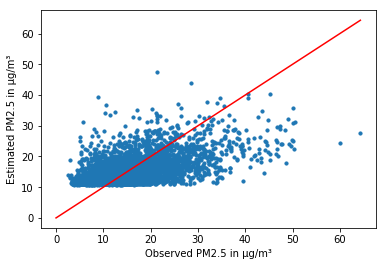

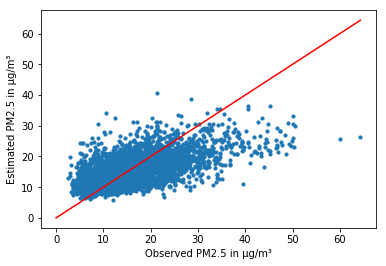

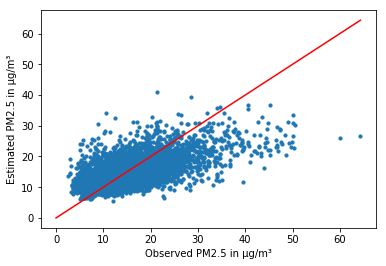

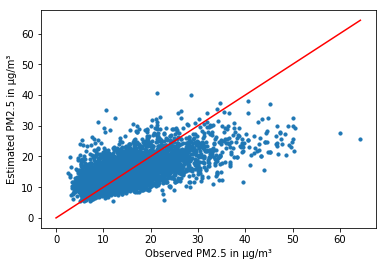

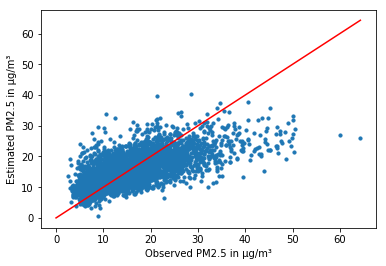

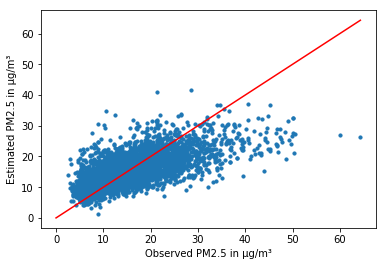

In [33]:
x = [x1,x2,x3,x4,x5,x6]
for i in range(len(x)):
    score,rmse,mae = train_model(x[i],y)
    print("R-value: ",score,"RMSE: ",rmse,"MAE: ",mae)
    print("\n")

In [4]:
spring = df[df['MONTH'].isin([3,4,5])]
summer = df[df['MONTH'].isin([6,7,8])]
fall = df[df['MONTH'].isin([9,10,11])]
winter = df[df['MONTH'].isin([12,1,2])]

In [14]:
x_win = pd.DataFrame(winter[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
x_sum = pd.DataFrame(summer[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y_sum = pd.DataFrame(summer['PM24H'])
y_win = pd.DataFrame(winter['PM24H'])

In [15]:
summer.shape

(4229, 23)

In [16]:
winter.shape

(7082, 23)

In [41]:
x.shape

(7082, 6)

In [58]:
def cross_win_sum(features,y,x_cross,y_cross,alpha):
    #X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(features, y, test_size = 0.2, random_state = 0)
    regression_model = Ridge(alpha)
    regression_model.fit(X_train, y_train)
    predictions_on_winter = sklearn.model_selection.cross_val_predict(regression_model,X_valid,y_valid,cv=5)
#     print (type(predictions_on_winter), type(y_valid))
    train_error = regression_model.score(X_train, y_train)
    valid_error = regression_model.score(X_valid,y_valid)
    print("For alpha: ",alpha)
    print("Trained on: ",X_train.shape," samples |","Train Score(R2 score):",train_error)
    print("Validated on:",X_valid.shape,"samples |","Validation Score(R2 score):",valid_error)
    r2 = pearsonr(y_valid.values.flatten(),predictions_on_winter.flatten())[0]
    mae = mean_absolute_error(y_valid,predictions_on_winter)
    mse = mean_squared_error(y_valid, predictions_on_winter)
    rmse = np.sqrt(mse)
    print("R-value: ",r2,"RMSE: ",rmse,"MAE: ",mae)
    regression_model.fit(X_train, y_train)
    predictions_on_summer = sklearn.model_selection.cross_val_predict(regression_model,x_cross,y_cross,cv=5)
    test_error = regression_model.score(x_cross, y_cross)
    print("Testing on summer:- Test Score(R2 score):",test_error)
    r2 = pearsonr(y_cross.values.flatten(),predictions_on_summer.flatten())[0]
    mae = mean_absolute_error(y_cross,predictions_on_summer)
    mse = mean_squared_error(y_cross,predictions_on_summer)
    rmse = np.sqrt(mse)
    print("R-value: ",r2,"RMSE: ",rmse,"MAE: ",mae)

In [60]:
alpha = [0.01,0.00001,0.001]
for j in range(len(alpha)):
    cross_win_sum(x_win,y_win,x_sum,y_sum,alpha[j])
    print("\n")

For alpha:  0.01
Trained on:  (5665, 6)  samples | Train Score(R2 score): 0.19680968873883475
Validated on: (1417, 6) samples | Validation Score(R2 score): 0.1926550852861295
R-value:  0.43361639576169275 RMSE:  4.660644522101056 MAE:  3.4198730906437147
Testing on summer:- Test Score(R2 score): 0.053168648020603726
R-value:  0.5427192408355659 RMSE:  7.632023637242757 MAE:  5.864384489199882


For alpha:  1e-05
Trained on:  (5665, 6)  samples | Train Score(R2 score): 0.1968096903787081
Validated on: (1417, 6) samples | Validation Score(R2 score): 0.19265277434371986
R-value:  0.433610162075053 RMSE:  4.660663085188935 MAE:  3.4198679065214432
Testing on summer:- Test Score(R2 score): 0.053243184002204735
R-value:  0.542718957161006 RMSE:  7.632034687440524 MAE:  5.864379335131512


For alpha:  0.001
Trained on:  (5665, 6)  samples | Train Score(R2 score): 0.19680969036230245
Validated on: (1417, 6) samples | Validation Score(R2 score): 0.19265300356509063
R-value:  0.4336107830649049 

(0.3912844551328143, 5.8964025330521155)

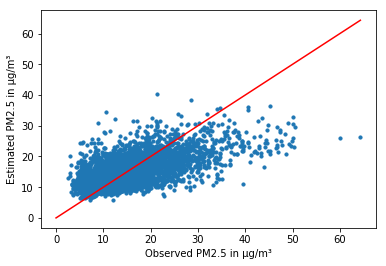

In [48]:
score,rmse = train_model(x2,y)
score,rmse

In [ ]:
score,rmse = train_model(x,y)
score,rmse

In [ ]:
score,rmse = train_model(x1,y)
score,rmse

In [14]:
predictions[0:5]

array([[15.65024472],
       [13.78728084],
       [10.05289109],
       [ 9.47495201],
       [17.32233465]])

Text(0, 0.5, 'Predictions')

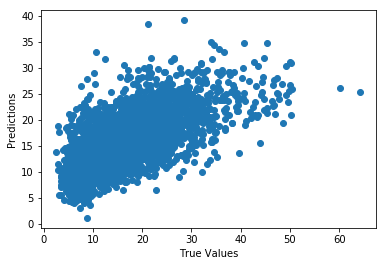

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [17]:
regression_model.score(X_test,y_test)

0.438682370683972

In [65]:
regression_model = linear_model.LinearRegression()
scores = cross_val_score(regression_model, x, y, cv=5)


In [66]:
list(scores)

[0.3877617939285911,
 0.338421386580699,
 0.37916415604597425,
 0.44430114818497823,
 0.40005497032673476]

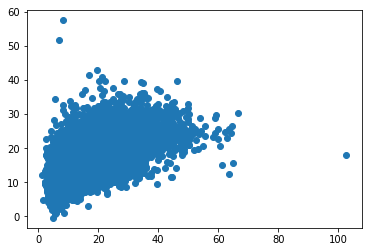

In [48]:
predictions = sklearn.model_selection.cross_val_predict(regression_model,x,y,cv=5)
plt.scatter(y,predictions)

In [50]:
sklearn.metrics.r2_score(y,predictions)

0.4139346876761292

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9DCBCDC18>,
      dtype=object)

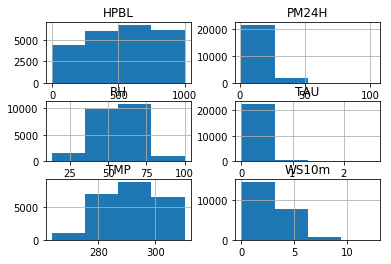

In [33]:
df1 = df[['TAU','PM24H','TMP','RH','HPBL','WS10m']]
df1.hist(bins=4)
# df['PM24H'].hist(bins=4)
# df['TMP'].hist(bins=4)
# df['RH'].hist(bins=4)

Slope: [[22.49910348]]
Intercept: [11.03622993]
Root mean squared error:  38.33489089546967
R2 score:  0.32882715674485585


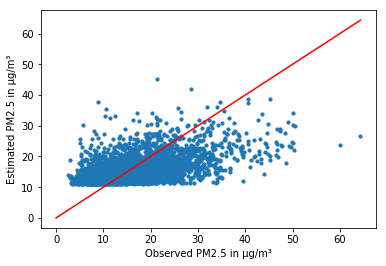

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
, r2_score
import sklearn


# generate random data-set
np.random.seed(0)
# x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
x=  pd.DataFrame(df['TAU'])
y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

# predicted values
t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()|

Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  32.06037057931678
R2 score:  0.438682370683972
R-value: 0.662331012926295


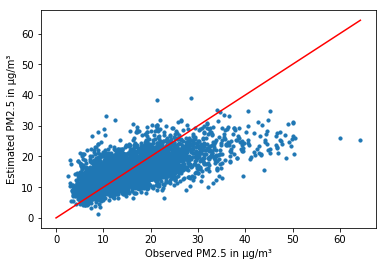

In [115]:
#MULTIPLE REGRESSION
import math

# generate random data-set
np.random.seed(0)
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('R-value:',math.sqrt(r2))

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [97]:
d1 = df.loc[df['StationNum'] == 18]
d1.head()

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
1369,18,-6,10890014,34.69,-86.58,2004,3,22,16.58,0.04,...,7.29,17,4,279.57,41.41,5.02,8.85,251.00,1000.20,29.94
1414,18,-6,10890014,34.69,-86.58,2004,3,23,17.25,0.08,...,11.00,17,4,285.03,32.77,3.48,4.71,360.75,1000.90,37.26
1488,18,-6,10890014,34.69,-86.58,2004,3,25,17.08,0.15,...,17.25,17,4,294.47,50.53,4.76,7.91,162.50,1001.40,22.71
1515,18,-6,10890014,34.69,-86.58,2004,3,26,16.17,0.32,...,11.58,16,4,294.28,60.03,4.83,8.93,143.75,999.35,18.11
1557,18,-6,10890014,34.69,-86.58,2004,3,28,15.92,0.07,...,14.38,16,4,296.72,54.96,2.86,8.49,581.50,993.25,19.70


Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  31.753157067903942
R2 score:  0.4651726402552947


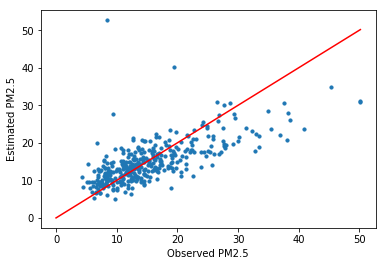

In [100]:
#Predict
x = pd.DataFrame(d1[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y = d1['PM24H']
y_predicted = regression_model.predict(x)




# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

# predicted values
t = np.linspace(0, y.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [101]:
d1.shape

(355, 23)

In [73]:
from scipy.stats import linregress

In [77]:
a = list(df['TAU'].values)
b = list(df['PM24H'].values)
linregress(a,b)

LinregressResult(slope=22.756035076199847, intercept=11.014390289589723, rvalue=0.553622734996213, pvalue=0.0, stderr=0.22434428331361628)

In [79]:
df1.corr()

,TAU,PM24H,TMP,RH,HPBL,WS10m
TAU,1.000000,0.553623,0.534821,0.281629,0.014602,-0.139001
PM24H,0.553623,1.000000,0.527427,0.133708,-0.000035,-0.284852
TMP,0.534821,0.527427,1.000000,0.223526,0.209034,-0.162217
RH,0.281629,0.133708,0.223526,1.000000,-0.233009,-0.076583
HPBL,0.014602,-0.000035,0.209034,-0.233009,1.000000,0.175562
WS10m,-0.139001,-0.284852,-0.162217,-0.076583,0.175562,1.000000


Slope: [ 1.14218515e+01 -3.27647471e-02  3.07833869e-01 -1.94243950e-03
 -7.46504868e-01 -3.12952950e-02]
Intercept: [-71.57581499]
Root mean squared error:  32.938707419511
R2 score:  0.4233043215856619


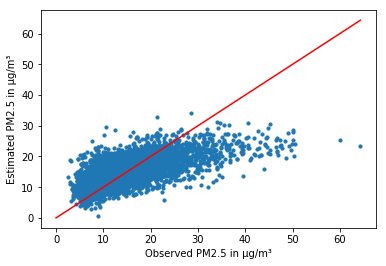

In [117]:
from sklearn import linear_model


#MULTIPLE REGRESSION
#Ridge

# generate random data-set
np.random.seed(0)
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = linear_model.Lasso(alpha=0.1)
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5 in μg/m\u00b3')
plt.ylabel('Estimated PM2.5 in μg/m\u00b3')

t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()